## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Aviation_Data.csv')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
# Event.Id #drop, uninformative
# Investigation.Type #drop, uninformative
# Accident.Number 
# Event.Date #split into month and year
# Location #keep to view specifics of US incidents
# Country #keep but change to US and non-US
# Injury.Severity  #drop b/c repeats info from the later injury categories 
# Aircraft.damage #keep
# Registration.Number #drop, uninformative
# Make #keep, maybe use to engineer a new feature using LLM 
# Model #keep, maybe use to engineer a new feature using LLM 
# Amateur.Built #keep: few nan (1.5k) vals, most are not amateur built (80k)
# Number.of.Engines #keep: few NAN values (7.5k), most are have 1 (70k)
# Engine.Type #keep, few unknown (2k) and nan vals (8.5k), most are reciprocating (70k)
# Purpose.of.flight #keep: few unknown (6.8k) and nan (7.6k) vals, most are personal (50k)
# Total.Fatal.Injuries #keep
# Total.Serious.Injuries #keep
# Total.Minor.Injuries #keep
# Total.Uninjured #keep
# Weather.Condition #keep, mostly split between low and high visibility 
# Report.Status #DROP, about 70k are probable cause or nan 
# Publication.Date #DROP, less important than event date; also, skewed towards 2020

In [6]:
#drop columns with more than 20% nans 
nan_cols = list(df.loc[:,df.isna().sum()/len(df) > .2].columns) 

#drop uninformative columns
nan_cols.extend(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Injury.Severity', 'Registration.Number', 'Report.Status', 'Publication.Date'])
nan_cols

['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier',
 'Broad.phase.of.flight',
 'Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Injury.Severity',
 'Registration.Number',
 'Report.Status',
 'Publication.Date']

In [7]:
# get a list of columns to keep
non_nan_cols = [x for x in df.columns if x not in nan_cols]
non_nan_cols

['Event.Date',
 'Location',
 'Country',
 'Aircraft.damage',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'Purpose.of.flight',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition']

In [8]:
# remove columns from df
df = df[non_nan_cols].copy()
df.head()

,Event.Date,Location,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


## Engineered Features

In [9]:
# Check if any of the injury columns have true values. If any do, fill nans with 0s. 
# If all columns are nans, assume the data was not logged and keep them as nans. 
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
injury_data_exists = df[injury_cols].apply(lambda col: any(col), axis = 1)

for col in injury_cols:
    df.loc[injury_data_exists & df[col].isna(), col] = 0

In [10]:
#Make note of dividing by zero situation in pecert.Injured and Percent.Died / Number of Passengers

df['Total.Passengers'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']+ df['Total.Uninjured']
df['Total.Injured'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
df['Percent.Injured'] = (df['Total.Injured'] / df['Total.Passengers']) * 100
df['Percent.Died'] = (df['Total.Fatal.Injuries'] / df['Total.Passengers']) * 100
df.loc[df['Total.Passengers'] == 0, ['Percent.Injured','Percent.Died']] = 0

In [11]:
#Aircraft Capacity
print(df['Total.Passengers'].apply(lambda x: 'Small' if x < 10 else \
                                   ('Mid-Size' if x < 40 else 'Large')).value_counts(dropna=False))
print("----------------------------")
df['Passenger.Load'] = df['Total.Passengers'].apply(lambda x: 'Small' if x < 10 else ('Mid-Size' if x < 40 else 'Large'))
df.head()

Small       86808
Large        2433
Mid-Size     1107
Name: Total.Passengers, dtype: int64
----------------------------


,Event.Date,Location,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died,Passenger.Load
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,2.0,2.0,100.0,100.000000,Small
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,4.0,4.0,100.0,100.000000,Small
2,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,3.0,3.0,100.0,100.000000,Small
3,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,2.0,2.0,100.0,100.000000,Small
4,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC,3.0,3.0,100.0,33.333333,Small


## Cleaning

In [12]:
# Remove rows where Amateur.Built is Yes or NaN, then remove Amateur.Built column
df = df.drop(df.loc[(df['Amateur.Built']=='Yes') |( df['Amateur.Built'].isna())].index)
df.reset_index(drop = True, inplace = True)
df.drop(columns = 'Amateur.Built', inplace = True)
df.head()

,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died,Passenger.Load
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,2.0,2.0,100.0,100.000000,Small
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,4.0,4.0,100.0,100.000000,Small
2,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,3.0,3.0,100.0,100.000000,Small
3,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,2.0,2.0,100.0,100.000000,Small
4,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC,3.0,3.0,100.0,33.333333,Small


In [13]:
# Clean Weather Condition
df['Weather.Condition'].replace({'Unk':'Unknown','UNK':'Unknown','VMC':'Visual Meteorological Conditions',\
                                 'IMC':'Instrumental Meteorological Conditions'}, inplace = True)
df['Weather.Condition'].fillna('Unknown', inplace = True)
df['Weather.Condition'].value_counts(dropna=False)

VMC        69084
IMC         5831
Unknown     4607
UNK          790
Name: Weather.Condition, dtype: int64

In [14]:
# Check if Number.of.Engines = 0 corresponds to no Engine.Type
df[(df['Number.of.Engines']==0) & ((df['Engine.Type']!='NONE') & (df['Engine.Type'].notna())\
                                   & (df['Engine.Type'] != 'Unknown'))]

,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died,Passenger.Load
21149,1989-03-31,"GREAT HARBOR, Bahamas",Bahamas,Destroyed,Cessna,421B,0.0,Reciprocating,Unknown,1.0,0.0,0.0,1.0,VMC,2.0,1.0,50.0,50.0,Small
67210,2013-09-02,"Hampshire, IL",United States,Substantial,SCHWEIZER,SGS 2 33A,0.0,None,Instructional,0.0,0.0,0.0,1.0,VMC,1.0,0.0,0.0,0.0,Small
67790,2014-03-15,"Wrightwood, CA",United States,Substantial,DG FLUGZEUGBAU GMBH,DG 1000S,0.0,None,Personal,0.0,1.0,0.0,1.0,VMC,2.0,1.0,50.0,0.0,Small
68251,2014-07-04,"Nephi, UT",United States,Substantial,CENTRAIR,101A,0.0,None,Personal,0.0,1.0,0.0,0.0,VMC,1.0,1.0,100.0,0.0,Small
69487,2015-06-14,"Pell City, AL",United States,Substantial,WEATHERLY,201B,0.0,Reciprocating,Aerial Application,0.0,0.0,0.0,1.0,VMC,1.0,0.0,0.0,0.0,Small
72160,2017-04-22,"Park City, UT",United States,Substantial,BALONY KUBICEK SPOL SRO,BB70Z,0.0,None,Business,0.0,0.0,0.0,9.0,VMC,9.0,0.0,0.0,0.0,Small
72596,2017-07-21,"Deatsville, AL",United States,Substantial,LET,L23,0.0,None,Instructional,0.0,1.0,0.0,0.0,VMC,1.0,1.0,100.0,0.0,Small
73491,2018-03-28,"Cave Creek, AZ",United States,Destroyed,ULTRAMAGIC SA,N 300,0.0,None,Business,0.0,0.0,0.0,13.0,VMC,13.0,0.0,0.0,0.0,Mid-Size
73682,2018-05-13,"Tunbridge, VT",United States,Substantial,SCHWEIZER,SGS123,0.0,None,Personal,0.0,0.0,0.0,1.0,VMC,1.0,0.0,0.0,0.0,Small
77888,2021-05-16,"Hampshire, IL",United States,Substantial,I.C.A.-BRASOV (ROMANIA),IS-28B2,0.0,None,Instructional,0.0,1.0,1.0,0.0,VMC,2.0,2.0,100.0,0.0,Small


In [15]:
# Replace Number.of.Engines = 0 with Number.of.Engines = Unknown where Engine.Type exists.
#Drop Unknown or null values for number of Engines
replace_indx = list(df[(df['Number.of.Engines']==0) 
                    & ((df['Engine.Type']!='NONE') 
                       & (df['Engine.Type'].notna()) 
                       & (df['Engine.Type'] != 'Unknown'))].index)

df.loc[replace_indx, 'Number.of.Engines'] = 'Unknown'
df.dropna(subset=['Number.of.Engines'],axis=0,inplace=True)
df = df[df['Number.of.Engines'] != 'Unknown']

In [16]:
# Clean Engine Type
df['Engine.Type'] = df.apply(lambda row: 'None' if row['Number.of.Engines']==0 else row['Engine.Type'], axis = 1)
df['Engine.Type'].fillna('UNK', inplace = True)
df['Engine.Type'].replace({'UNK':'Unknown'}, inplace = True)
df['Engine.Type'].value_counts(dropna=False)

Reciprocating      61652
Unknown             7414
Turbo Shaft         3579
Turbo Prop          3314
Turbo Fan           2468
None                1170
Turbo Jet            690
Geared Turbofan       12
Electric              10
LR                     2
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [17]:
# Aircraft Damage
df['Aircraft.damage'].fillna('Unknown', inplace = True)
df['Aircraft.damage'].value_counts(dropna = False)

Substantial    57928
Destroyed      16407
Unknown         3263
Minor           2714
Name: Aircraft.damage, dtype: int64

In [18]:
#Transform the Event Date into three separate Date columns that specify day, month and year of the incident.
#Dropping 'Event.Date' once the columns are created:

df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Event.Day'] = df['Event.Date'].map(lambda x: x.day)
df['Event.Month'] = df['Event.Date'].map(lambda x: x.month)
df['Event.Year'] = df['Event.Date'].map(lambda x: x.year)
df.drop(['Event.Date'], axis=1, inplace=True)

In [19]:
#Grouping all the Countries outside of the US as "Foreign Country"
df.loc[df['Country'] != 'United States', 'Country'] = 'Foreign Country'

In [20]:
#Filling the Null Values with "UNKNOWN" the the Location Column
df['Location'] = df['Location'].fillna('UNKNOWN')

# Adjusting the Column so it shows code of the corresponding State, if it's Unknown or outside of the US, label accordingly
df['Location'] = df['Location'].apply(lambda location: location.split(', ')[-1] if \
                                      len(location.split(', ')) > 1 and len(location.split(', ')[-1]) == 2 else \
                                      'Unknown/Foreign Location')

In [21]:
#Cleaning the 'Make' Column
characters_to_remove = ['(', ')', ',', '.', '%', '?']
df['Make'] = df['Make'].str.title().fillna('UNKNOWN')
df['Make'] = df['Make'].map(lambda x: ''.join(char for char in x if char not in characters_to_remove))
top_50_makes = df['Make'].value_counts().index[:50]
df = df[df['Make'].isin(top_50_makes)]

In [23]:
#Replacing NaN values for 'Unknown in 'Purpose of flight':
df['Purpose.of.flight'].fillna('Unknown', inplace=True)

In [24]:
#Cleaning the "Model" column

df['Model'] = df['Model'].str.title().fillna('UNKNOWN')

## Visualize KPIs

## Plot features

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80312 entries, 0 to 80311
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                80312 non-null  object 
 1   Country                 80312 non-null  object 
 2   Aircraft.damage         80312 non-null  object 
 3   Make                    80312 non-null  object 
 4   Model                   80312 non-null  object 
 5   Number.of.Engines       74606 non-null  object 
 6   Engine.Type             80312 non-null  object 
 7   Purpose.of.flight       80312 non-null  object 
 8   Total.Fatal.Injuries    80312 non-null  float64
 9   Total.Serious.Injuries  80312 non-null  float64
 10  Total.Minor.Injuries    80312 non-null  float64
 11  Total.Uninjured         80312 non-null  float64
 12  Weather.Condition       80312 non-null  object 
 13  Total.Passengers        80312 non-null  float64
 14  Total.Injured           80312 non-null

In [27]:
df.groupby('Make').mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died,Event.Day,Event.Month,Event.Year
Make,,,,,,,,,,,
1200,0.0,1.0,0.0,0.0,1.0,1.0,100.0,0.0,14.0,10.0,2005.0
177Mf Llc,0.0,2.0,0.0,0.0,2.0,2.0,100.0,0.0,4.0,5.0,2014.0
2021Fx3 Llc,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,13.0,1.0,2022.0
3Xtrim,1.0,0.0,1.0,0.0,2.0,2.0,100.0,50.0,17.0,7.0,2015.0
737,0.0,0.0,0.0,164.5,164.5,0.0,0.0,0.0,25.0,6.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...
Zlin Aviation,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,15.0,11.0,2020.0
Zlin Aviation SRO,2.0,0.0,0.0,0.0,2.0,2.0,100.0,100.0,15.0,8.0,2007.0
Zodiac,1.0,0.0,1.0,0.0,2.0,2.0,100.0,50.0,19.0,1.0,2018.0


In [28]:
df['Number.of.Engines'].value_counts(dropna=False)

1.0        61534
2.0        10995
NaN         5706
0.0         1152
3.0          482
4.0          429
Unknown       10
8.0            3
6.0            1
Name: Number.of.Engines, dtype: int64

In [30]:
df['Injured.Category'] = df['Percent.Injured'].apply(lambda x: 'High' if x >= 50 else 'Low')

In [31]:
top_20_makes = df['Make'].value_counts().index[:20]

df2 = df[df['Make'].isin(top_20_makes)]

In [32]:
df2.groupby('Make').mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died,Event.Day,Event.Month,Event.Year
Make,,,,,,,,,,,
Aero Commander,0.564403,0.208431,0.215457,1.138173,2.126464,0.988290,50.006134,25.911676,15.145199,6.775176,1996.386417
Aeronca,0.182965,0.244479,0.263407,0.899054,1.589905,0.690852,41.600946,10.778128,15.547319,6.479495,1998.410095
Air Tractor,0.175109,0.108538,0.160637,0.589001,1.033285,0.444284,42.305837,16.111915,16.345876,6.554269,2001.159190
Beech,0.702915,0.204223,0.250374,1.468984,2.626495,1.157511,46.507970,27.141228,15.830157,6.597907,1998.000000
Bell,0.485566,0.320503,0.410807,1.134345,2.351221,1.216876,49.066985,17.323181,15.747964,6.535899,1998.683568
Bellanca,0.330769,0.188462,0.229808,0.889423,1.638462,0.749038,44.975962,19.094551,15.695192,6.541346,1995.452885
Boeing,3.148629,0.797257,0.855448,76.488139,81.289474,4.801334,10.243263,4.281721,15.515567,6.575241,2004.204225
Cessna,0.354198,0.180242,0.253115,1.268348,2.055903,0.787555,36.590972,15.304205,15.766739,6.519392,1997.352128
Champion,0.250485,0.165049,0.217476,0.924272,1.557282,0.633010,40.873786,15.889968,15.361165,6.747573,1998.335922


In [33]:
df2.dropna(subset=['Number.of.Engines'],axis=0,inplace=True)

In [34]:
df2['Number.of.Engines'].value_counts()

1.0        51067
2.0         8039
3.0          391
0.0          365
4.0          268
Unknown        3
Name: Number.of.Engines, dtype: int64

In [35]:
df2.dropna(subset=['Number.of.Engines'],axis=0,inplace=True)
df2 = df2[df2['Number.of.Engines'] != 'Unknown']

In [36]:
df2.groupby(['Make','Number.of.Engines']).mean()

Total.Fatal.Injuries  \
Make              Number.of.Engines                         
Aero Commander    1.0                            0.221198   
                  2.0                            0.762162   
Aeronca           1.0                            0.182540   
Air Tractor       1.0                            0.147920   
Beech             0.0                            1.636364   
                  1.0                            0.540026   
                  2.0                            0.789793   
Bell              0.0                            0.416667   
                  1.0                            0.352811   
                  2.0                            0.530303   
                  4.0                            0.000000   
Bellanca          0.0                            0.000000   
                  1.0                            0.329423   
Boeing            0.0                            3.466667   
                  1.0                            0.108992   
                  2.0                            1.666288   
                  3.0                            1.946970   
                  4.0                            4.396476   
Cessna            0.0                            0.363636   
                  1.0                            0.268105   
                  2.0                            0.707424   
                  4.0                            0.500000   
Champion          1.0                            0.242972   
                  2.0                            0.000000   
De Havilland      0.0                            0.333333   
                  1.0                            0.546875   
                  2.0                            1.043860   
                  4.0                            0.000000   
Grumman           0.0                            0.333333   
                  1.0                            0.120837   
                  2.0                            1.136842   
Hughes            0.0                            0.500000   
                  1.0                            0.192483   
Luscombe          1.0                            0.174447   
Maule             0.0                            0.000000   
                  1.0                            0.172775   
Mcdonnell Douglas 0.0                            0.500000   
                  1.0                            0.387755   
                  2.0                            1.323144   
                  3.0                            0.929134   
                  4.0                            7.375000   
Mooney            0.0                            5.000000   
                  1.0                            0.504644   
                  2.0                            0.000000   
Piper             0.0                            0.413043   
                  1.0                            0.372064   
                  2.0                            0.696571   
                  4.0                            0.000000   
Robinson          1.0                            0.350198   
Schweizer         0.0                            0.096154   
                  1.0                            0.113208   
                  2.0                            0.000000   
Stinson           1.0                            0.158257   

                                     Total.Serious.Injuries  \
Make              Number.of.Engines                           
Aero Commander    1.0                              0.175115   
                  2.0                              0.270270   
Aeronca           1.0                              0.246032   
Air Tractor       1.0                              0.106317   
Beech             0.0                              0.000000   
                  1.0                              0.224015   
                  2.0                              0.175341   
Bell              0.0                              0.041667   
                  1.0                              

In [54]:
df2.columns

Index(['Location', 'Country', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Total.Passengers', 'Total.Injured', 'Percent.Injured', 'Percent.Died',
       'Passenger.Load', 'Event.Day', 'Event.Month', 'Event.Year',
       'Injured.Category'],
      dtype='object')

In [37]:
df2 = df2.loc[df2['Event.Year'] > 1980]
df2.head()

,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,...,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died,Passenger.Load,Event.Day,Event.Month,Event.Year,Injured.Category
6,MN,United States,Destroyed,Cessna,180,1,Reciprocating,Personal,4.0,0.0,...,IMC,4.0,4.0,100.0,100.0,Small,1,8,1981,High
7,WA,United States,Substantial,Cessna,140,1,Reciprocating,Personal,0.0,0.0,...,VMC,2.0,0.0,0.0,0.0,Small,1,1,1982,Low
8,NJ,United States,Substantial,Cessna,401B,2,Reciprocating,Business,0.0,0.0,...,IMC,2.0,0.0,0.0,0.0,Small,1,1,1982,Low
10,NM,United States,Substantial,Piper,Pa-28-161,1,Reciprocating,Personal,0.0,0.0,...,VMC,1.0,0.0,0.0,0.0,Small,1,1,1982,Low
11,AL,United States,Substantial,Beech,V35B,1,Reciprocating,Personal,0.0,0.0,...,VMC,1.0,0.0,0.0,0.0,Small,1,1,1982,Low


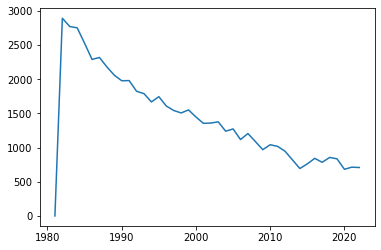

In [38]:
# Number of Incidents per year

plt.plot(df2['Event.Year'].value_counts().sort_index().index,df2['Event.Year'].value_counts().sort_index().values)

<BarContainer object of 12 artists>

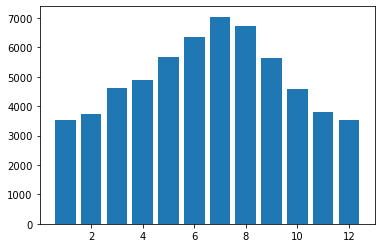

In [39]:
# Number of incidents per month

plt.bar(df2['Event.Month'].value_counts().sort_index().index,df2['Event.Month'].value_counts().sort_index().values)

<AxesSubplot:xlabel='Location'>

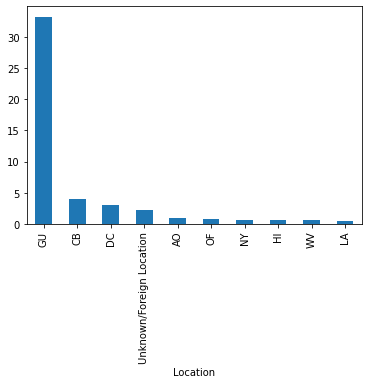

In [47]:
df2.groupby('Location').mean().sort_values(by = 'Total.Fatal.Injuries', ascending = False).head(10)['Total.Fatal.Injuries'].plot(kind = 'bar')

In [ ]:
plt.bar(x=df2['Weather.Condition'],height=df2['Percent.Died'].mean())

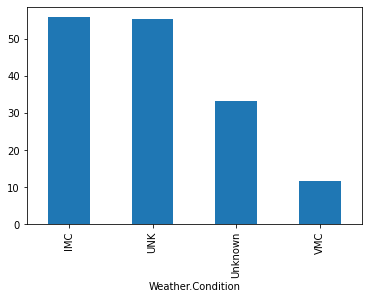

In [65]:
df2.groupby('Weather.Condition')['Percent.Died'].mean().plot(kind='bar');

In [53]:
df2.groupby('Weather.Condition')['Percent.Died'].mean()

Weather.Condition
IMC        55.865497
UNK        55.513221
Unknown    33.168766
VMC        11.745296
Name: Percent.Died, dtype: float64

In [60]:
df['Make'].value_counts()[:50]

Cessna                         27047
Piper                          14817
Beech                           5352
Bell                            2702
Boeing                          2698
Mooney                          1325
Robinson                        1220
Grumman                         1167
Bellanca                        1040
Hughes                           929
Schweizer                        769
Air Tractor                      691
Aeronca                          634
Mcdonnell Douglas                598
Maule                            588
Champion                         515
Stinson                          438
Aero Commander                   427
De Havilland                     420
Luscombe                         412
Aerospatiale                     386
North American                   383
Taylorcraft                      383
Rockwell                         353
Hiller                           345
Cirrus Design Corp               298
Enstrom                          296
A

In [61]:
df2.head()

,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,...,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died,Passenger.Load,Event.Day,Event.Month,Event.Year,Injured.Category
6,MN,United States,Destroyed,Cessna,180,1,Reciprocating,Personal,4.0,0.0,...,IMC,4.0,4.0,100.0,100.0,Small,1,8,1981,High
7,WA,United States,Substantial,Cessna,140,1,Reciprocating,Personal,0.0,0.0,...,VMC,2.0,0.0,0.0,0.0,Small,1,1,1982,Low
8,NJ,United States,Substantial,Cessna,401B,2,Reciprocating,Business,0.0,0.0,...,IMC,2.0,0.0,0.0,0.0,Small,1,1,1982,Low
10,NM,United States,Substantial,Piper,Pa-28-161,1,Reciprocating,Personal,0.0,0.0,...,VMC,1.0,0.0,0.0,0.0,Small,1,1,1982,Low
11,AL,United States,Substantial,Beech,V35B,1,Reciprocating,Personal,0.0,0.0,...,VMC,1.0,0.0,0.0,0.0,Small,1,1,1982,Low


In [70]:
df['Number.of.Engines'].value_counts(dropna=False)

1.0        61534
2.0        10995
NaN         5706
0.0         1152
3.0          482
4.0          429
Unknown       10
8.0            3
6.0            1
Name: Number.of.Engines, dtype: int64

In [68]:
df2['Number.of.Engines'].value_counts(dropna=False, normalize=True)

1.0    0.849283
2.0    0.133686
3.0    0.006503
0.0    0.006071
4.0    0.004457
Name: Number.of.Engines, dtype: float64

In [69]:
df2.shape

(60126, 22)